# EDA - HDB Sample

In [2]:
import numpy as np 
import pandas as pd

# Graphical Component
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data

In [3]:
df_train = pd.read_csv('./datasets/train.csv', low_memory=False, index_col=0)

In [4]:
df_train.shape

(150634, 76)

In [5]:
df_test = pd.read_csv('./datasets/test.csv', low_memory=False, index_col=0)

In [6]:
df_test.shape

(16737, 75)

In [7]:
y_test = pd.read_csv('./datasets/sample_sub_reg.csv', low_memory=False, index_col=0)

In [8]:
y_test

,Predicted
Id,
114982,500000
95653,500000
40303,500000
109506,500000
100149,500000
...,...
23347,500000
54003,500000
128921,500000


## Basic Data Exploration

In [9]:
df_train.shape

(150634, 76)

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150634 entries, 88471 to 185947
Data columns (total 76 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Tranc_YearMonth            150634 non-null  object 
 1   town                       150634 non-null  object 
 2   flat_type                  150634 non-null  object 
 3   block                      150634 non-null  object 
 4   street_name                150634 non-null  object 
 5   storey_range               150634 non-null  object 
 6   floor_area_sqm             150634 non-null  float64
 7   flat_model                 150634 non-null  object 
 8   lease_commence_date        150634 non-null  int64  
 9   resale_price               150634 non-null  float64
 10  Tranc_Year                 150634 non-null  int64  
 11  Tranc_Month                150634 non-null  int64  
 12  mid_storey                 150634 non-null  int64  
 13  lower                      150

In [11]:
df_test.shape

(16737, 75)

In [12]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16737 entries, 114982 to 146210
Data columns (total 75 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Tranc_YearMonth            16737 non-null  object 
 1   town                       16737 non-null  object 
 2   flat_type                  16737 non-null  object 
 3   block                      16737 non-null  object 
 4   street_name                16737 non-null  object 
 5   storey_range               16737 non-null  object 
 6   floor_area_sqm             16737 non-null  float64
 7   flat_model                 16737 non-null  object 
 8   lease_commence_date        16737 non-null  int64  
 9   Tranc_Year                 16737 non-null  int64  
 10  Tranc_Month                16737 non-null  int64  
 11  mid_storey                 16737 non-null  int64  
 12  lower                      16737 non-null  int64  
 13  upper                      16737 non-null  in

In [13]:
y_test.head()

,Predicted
Id,
114982,500000
95653,500000
40303,500000
109506,500000
100149,500000


**There are 76 columns in the training set and there are only 75 columns in test set. The resale price is missing in the test set. Imported y_test, but the data cannot be used.Will work on training datasets instead.**

In [14]:
df = df_train

### Checking for Duplicates

In [15]:
df.duplicated().sum()

np.int64(362)

In [16]:
df[df.duplicated(keep=False)].sort_values(by=list(df.columns))

,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,...,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude
id,,,,,,,,,,,,,,,,,,,,,
18401,2012-03,BUKIT BATOK,3 ROOM,212,BT BATOK ST 21,06 TO 10,67.0,New Generation,1985,341000.0,...,61,0,1.345945,103.753589,163.557069,Bukit View Secondary School,205,0,1.345723,103.752278
18402,2012-03,BUKIT BATOK,3 ROOM,212,BT BATOK ST 21,06 TO 10,67.0,New Generation,1985,341000.0,...,61,0,1.345945,103.753589,163.557069,Bukit View Secondary School,205,0,1.345723,103.752278
9250,2012-04,BUKIT BATOK,3 ROOM,167,BT BATOK WEST AVE 8,01 TO 05,74.0,Model A,1984,333000.0,...,40,0,1.349195,103.741000,220.313941,Bukit Batok Secondary School,223,0,1.348351,103.740873
9251,2012-04,BUKIT BATOK,3 ROOM,167,BT BATOK WEST AVE 8,01 TO 05,74.0,Model A,1984,333000.0,...,40,0,1.349195,103.741000,220.313941,Bukit Batok Secondary School,223,0,1.348351,103.740873
58605,2012-04,JURONG EAST,3 ROOM,303,JURONG EAST ST 32,01 TO 05,67.0,New Generation,1983,330000.0,...,33,0,1.348685,103.732975,701.283204,Bukit Batok Secondary School,223,0,1.348351,103.740873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68352,2021-04,HOUGANG,3 ROOM,473B,UPP SERANGOON CRES,04 TO 06,68.0,Model A,2017,360000.0,...,76,1,1.373174,103.897659,101.209122,Serangoon Secondary School,188,0,1.375555,103.901910
67780,2021-04,PUNGGOL,4 ROOM,308A,PUNGGOL WALK,01 TO 03,92.0,Premium Apartment,2016,500000.0,...,110,0,1.406871,103.898911,853.411164,Edgefield Secondary School,226,0,1.400179,103.902141
67779,2021-04,PUNGGOL,4 ROOM,308A,PUNGGOL WALK,01 TO 03,92.0,Premium Apartment,2016,500000.0,...,110,0,1.406871,103.898911,853.411164,Edgefield Secondary School,226,0,1.400179,103.902141


In [17]:
df.drop_duplicates(inplace=True)

In [18]:
df.duplicated().sum()

np.int64(0)

### Checking for Null Values

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150272 entries, 88471 to 185947
Data columns (total 76 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Tranc_YearMonth            150272 non-null  object 
 1   town                       150272 non-null  object 
 2   flat_type                  150272 non-null  object 
 3   block                      150272 non-null  object 
 4   street_name                150272 non-null  object 
 5   storey_range               150272 non-null  object 
 6   floor_area_sqm             150272 non-null  float64
 7   flat_model                 150272 non-null  object 
 8   lease_commence_date        150272 non-null  int64  
 9   resale_price               150272 non-null  float64
 10  Tranc_Year                 150272 non-null  int64  
 11  Tranc_Month                150272 non-null  int64  
 12  mid_storey                 150272 non-null  int64  
 13  lower                      150

In [20]:
null_column = df.columns[df.isnull().any()].tolist()
null_column

['Mall_Nearest_Distance',
 'Mall_Within_500m',
 'Mall_Within_1km',
 'Mall_Within_2km',
 'Hawker_Within_500m',
 'Hawker_Within_1km',
 'Hawker_Within_2km']

In [21]:
df[null_column].isnull().sum()


Mall_Nearest_Distance      824
Mall_Within_500m         92564
Mall_Within_1km          25378
Mall_Within_2km           1933
Hawker_Within_500m       97151
Hawker_Within_1km        60715
Hawker_Within_2km        29124
dtype: int64

### Descriptive Statistics

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
floor_area_sqm,150272.0,97.208086,24.411030,31.000000,75.000000,95.000000,112.000000,2.800000e+02
lease_commence_date,150272.0,1992.443622,12.134476,1966.000000,1984.000000,1992.000000,2001.000000,2.019000e+03
resale_price,150272.0,449190.633689,143396.435327,150000.000000,347000.000000,420000.000000,520000.000000,1.258000e+06
Tranc_Year,150272.0,2016.490763,2.753418,2012.000000,2014.000000,2017.000000,2019.000000,2.021000e+03
Tranc_Month,150272.0,6.581785,3.346493,1.000000,4.000000,7.000000,9.000000,1.200000e+01
mid_storey,150272.0,8.283353,5.507868,2.000000,5.000000,8.000000,11.000000,5.000000e+01
lower,150272.0,7.246846,5.514934,1.000000,4.000000,7.000000,10.000000,4.900000e+01
upper,150272.0,9.319860,5.507183,3.000000,6.000000,9.000000,12.000000,5.100000e+01
mid,150272.0,8.283353,5.507868,2.000000,5.000000,8.000000,11.000000,5.000000e+01
floor_area_sqft,150272.0,1046.347838,262.760325,333.684000,807.300000,1022.580000,1205.568000,3.013920e+03


There is no negative figures.

### Univariate Analysis

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150272 entries, 88471 to 185947
Data columns (total 76 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Tranc_YearMonth            150272 non-null  object 
 1   town                       150272 non-null  object 
 2   flat_type                  150272 non-null  object 
 3   block                      150272 non-null  object 
 4   street_name                150272 non-null  object 
 5   storey_range               150272 non-null  object 
 6   floor_area_sqm             150272 non-null  float64
 7   flat_model                 150272 non-null  object 
 8   lease_commence_date        150272 non-null  int64  
 9   resale_price               150272 non-null  float64
 10  Tranc_Year                 150272 non-null  int64  
 11  Tranc_Month                150272 non-null  int64  
 12  mid_storey                 150272 non-null  int64  
 13  lower                      150

In [24]:
df['Tranc_YearMonth'].unique()

array(['2016-05', '2012-07', '2013-07', '2012-04', '2017-12', '2013-01',
       '2018-05', '2012-03', '2020-01', '2014-06', '2013-06', '2018-03',
       '2017-07', '2015-08', '2019-10', '2018-01', '2020-11', '2015-12',
       '2017-08', '2015-07', '2019-04', '2019-08', '2020-06', '2020-07',
       '2017-09', '2016-03', '2012-11', '2012-12', '2018-11', '2013-04',
       '2020-12', '2019-03', '2017-04', '2016-12', '2021-04', '2012-10',
       '2014-07', '2018-04', '2017-01', '2015-04', '2012-06', '2013-08',
       '2019-07', '2017-02', '2020-08', '2017-10', '2020-10', '2015-01',
       '2020-02', '2019-01', '2019-09', '2016-06', '2016-08', '2018-12',
       '2018-07', '2015-03', '2012-05', '2014-04', '2014-09', '2014-12',
       '2015-09', '2017-11', '2020-03', '2015-06', '2012-09', '2014-11',
       '2014-05', '2021-01', '2012-08', '2016-04', '2013-05', '2016-02',
       '2016-01', '2018-02', '2014-10', '2021-02', '2017-06', '2014-03',
       '2018-06', '2019-02', '2020-04', '2021-03', 

**We can split into year and month.**

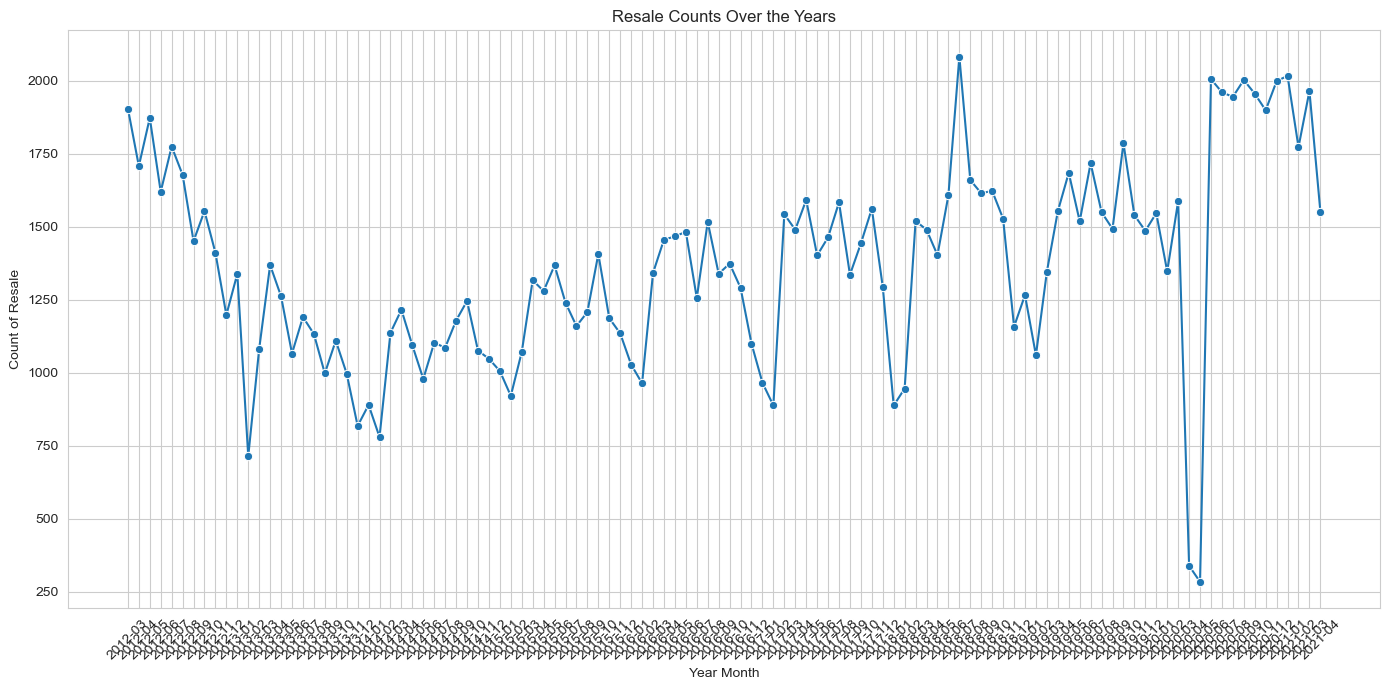

In [25]:
month_counts = df['Tranc_YearMonth'].value_counts().sort_index()
sns.set_style("whitegrid")
plt.figure(figsize=(14, 7))
sns.lineplot(x=month_counts.index, y=month_counts.values, marker='o')
plt.title('Resale Counts Over the Years')
plt.xlabel('Year Month')
plt.ylabel('Count of Resale')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The charts shows that the number of resale flat is pretty much cyclical.

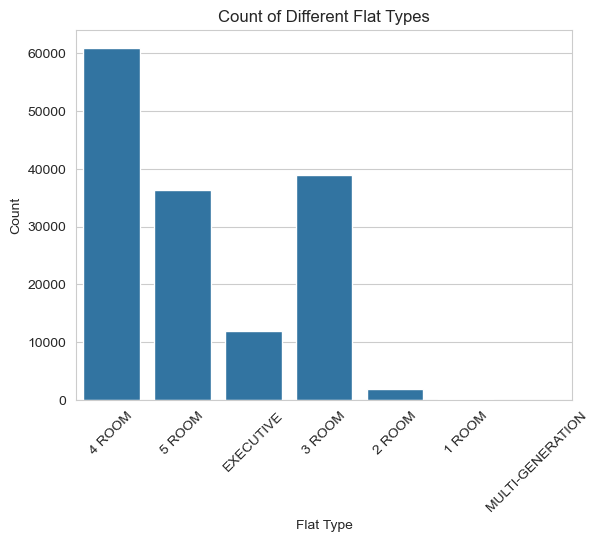

In [26]:
count_plot = sns.countplot(x='flat_type', data=df)
plt.title('Count of Different Flat Types')
plt.xlabel('Flat Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

3-room and 4 room are the most popular.

In [27]:
df.flat_type.unique()

array(['4 ROOM', '5 ROOM', 'EXECUTIVE', '3 ROOM', '2 ROOM', '1 ROOM',
       'MULTI-GENERATION'], dtype=object)

In [28]:
df.flat_model.unique()

array(['Model A', 'Improved', 'Apartment', 'Simplified', 'New Generation',
       'Premium Apartment', 'Model A2', 'Maisonette', 'Standard', 'DBSS',
       'Terrace', 'Model A-Maisonette', 'Type S1',
       'Premium Apartment Loft', 'Adjoined flat', 'Multi Generation',
       'Type S2', 'Premium Maisonette', 'Improved-Maisonette', '2-room'],
      dtype=object)

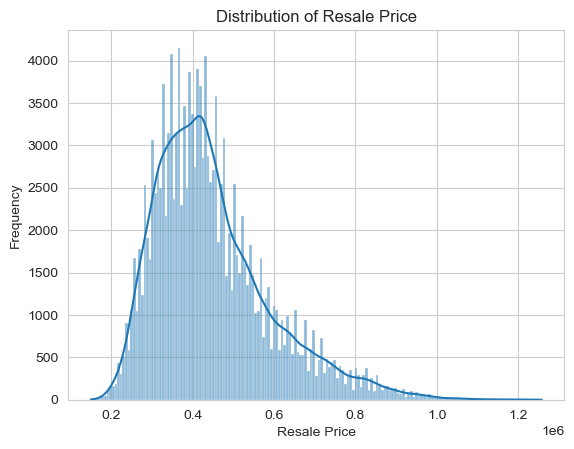

In [29]:
sns.histplot(df['resale_price'], kde=True)
plt.title('Distribution of Resale Price')
plt.xlabel('Resale Price')
plt.ylabel('Frequency')
plt.show()

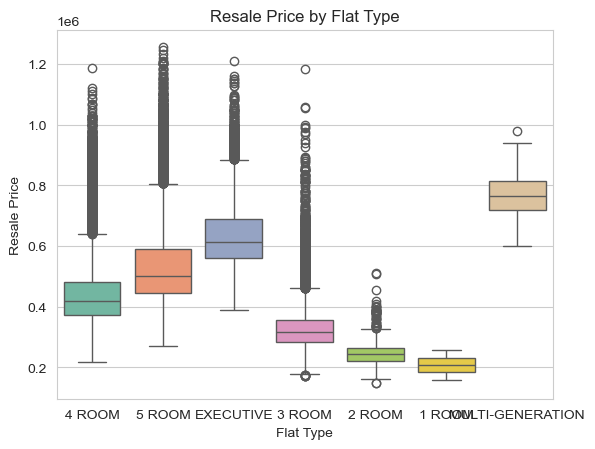

In [30]:
sns.boxplot(x='flat_type', y='resale_price', data=df, hue='flat_type', palette='Set2')
plt.title('Resale Price by Flat Type')
plt.xlabel('Flat Type')
plt.ylabel('Resale Price')
plt.xticks(rotation=0)
plt.show()

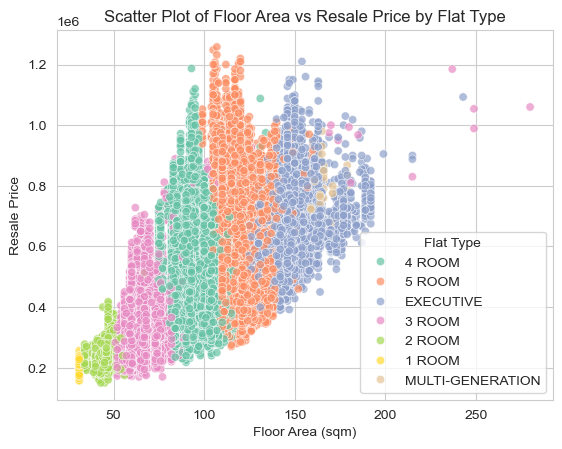

In [31]:
sns.scatterplot(x='floor_area_sqm', y='resale_price', hue='flat_type', data=df, palette='Set2', alpha=0.7)
plt.title('Scatter Plot of Floor Area vs Resale Price by Flat Type')
plt.xlabel('Floor Area (sqm)')
plt.ylabel('Resale Price')
plt.legend(title='Flat Type')
plt.show()

### Multivariate Analysis

In [ ]:
flat_type_model = df[['flat_type', 'flat_model', 'floor_area_sqm', 'resale_price']].groupby(['flat_type', 'flat_model']).mean()
flat_type_model

floor_area_sqm  resale_price
flat_type        flat_model                                          
1 ROOM           Improved                     31.000000  2.070155e+05
2 ROOM           2-room                       50.750000  2.480000e+05
                 DBSS                         50.000000  3.000000e+05
                 Improved                     45.414587  2.433968e+05
                 Model A                      46.383989  2.492683e+05
                 Premium Apartment            51.783784  2.526486e+05
                 Standard                     44.942568  2.423502e+05
3 ROOM           DBSS                         65.755435  5.057995e+05
                 Improved                     65.206836  3.185553e+05
                 Model A                      71.703023  3.463834e+05
                 New Generation               69.851083  3.195350e+05
                 Premium Apartment            67.474699  4.105037e+05
                 Simplified                   64.372141  3.089297e+05
                 Standard                     60.477363  3.088376e+05
                 Terrace                     108.883721  8.108271e+05
4 ROOM           Adjoined flat               116.192308  6.091923e+05
                 DBSS                         89.921797  6.954107e+05
                 Improved                     85.169690  4.466255e+05
                 Model A                      99.134943  4.551402e+05
                 Model A2                     89.216085  3.691446e+05
                 New Generation               93.159049  4.175360e+05
                 Premium Apartment            94.776700  4.576059e+05
                 Premium Apartment Loft       97.944444  8.900216e+05
                 Simplified                   84.495940  3.763219e+05
                 Standard                     77.420000  4.524335e+05
                 Terrace                     114.555556  8.898889e+05
                 Type S1                      94.363636  9.050422e+05
5 ROOM           Adjoined flat               135.420290  6.679009e+05
                 DBSS                        111.895282  8.384621e+05
                 Improved                    117.805799  5.245434e+05
                 Improved-Maisonette         135.789474  6.775731e+05
                 Model A                     134.405573  5.546933e+05
                 Model A-Maisonette          140.938931  6.978675e+05
                 Premium Apartment           113.722564  4.947113e+05
                 Premium Apartment Loft      148.000000  8.483269e+05
                 Standard                    118.905470  6.193263e+05
                 Type S2                     106.125984  1.019220e+06
EXECUTIVE        Adjoined flat               161.705263  7.587183e+05
                 Apartment                   143.736340  6.203696e+05
                 Maisonette                  147.902775  6.744154e+05
                 Premium Apartment           133.201534  5.592046e+05
                 Premium Maisonette          160.466667  7.605333e+05
MULTI-GENERATION Multi Generation            161.250000  7.679920e+05

In [72]:
four_room = df[df['flat_type'] == '4 ROOM']

In [105]:
four_room_select = four_room[['flat_model', 'floor_area_sqm', 'resale_price', 'town']]
four_room_select

,flat_model,floor_area_sqm,resale_price,town
id,,,,
88471,Model A,90.0,680000.0,KALLANG/WHAMPOA
86070,Model A,103.0,550000.0,BISHAN
153632,Simplified,83.0,298000.0,YISHUN
90310,Premium Apartment,90.0,625000.0,SENGKANG
52757,Model A,94.0,770000.0,BUKIT MERAH
...,...,...,...,...
149220,Model A,93.0,450000.0,BUKIT PANJANG
94196,New Generation,92.0,395000.0,CLEMENTI
56385,Model A,92.0,450000.0,PUNGGOL


In [107]:
type(four_room_select)

pandas.core.frame.DataFrame

In [123]:
aa = four_room_select[['flat_model', 'floor_area_sqm', 'resale_price']].groupby(['flat_model']).mean()
aa

,floor_area_sqm,resale_price
flat_model,,
Adjoined flat,116.192308,609192.269231
DBSS,89.921797,695410.685524
Improved,85.169690,446625.505703
Model A,99.134943,455140.191919
Model A2,89.216085,369144.595930
New Generation,93.159049,417535.991731
Premium Apartment,94.776700,457605.880702
Premium Apartment Loft,97.944444,890021.555556
Simplified,84.495940,376321.867989


In [121]:
#sns.catplot(data=aa, x='flat_model', y='resale_price')

In [129]:
#less_500 = four_room[four_room['resale_price'] <= 500000 & four_room['floor_area_sqm'] <= 100]

In [127]:
less_500 = four_room[four_room['resale_price'] <= 500000]

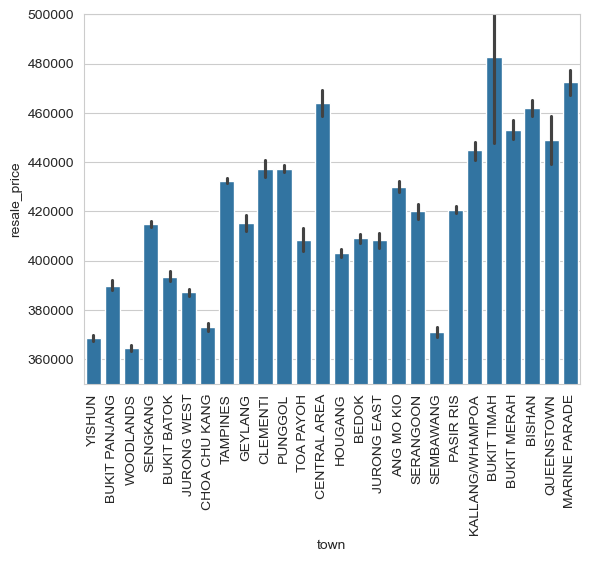

In [128]:
sns.barplot(data=less_500, x='town', y='resale_price')
plt.xticks(rotation=90)
plt.ylim(350000, 500000)
plt.show()

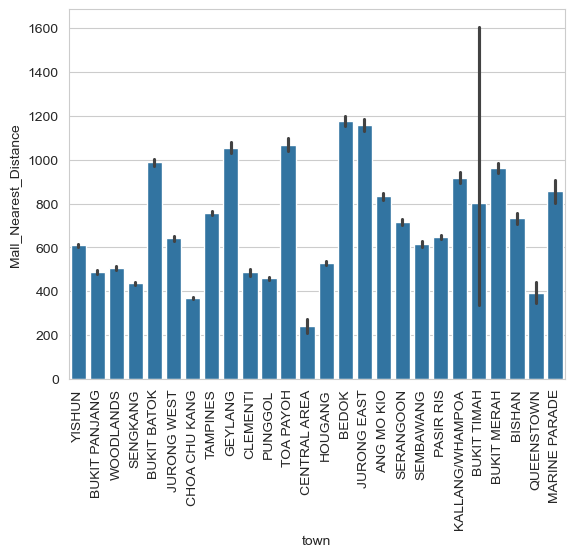

In [114]:
sns.barplot(data=less_500, x='town', y='Mall_Nearest_Distance')
plt.xticks(rotation=90)
plt.show()

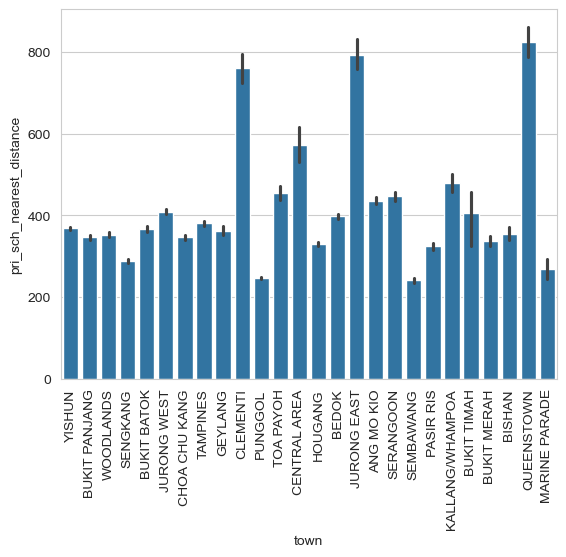

In [115]:
sns.barplot(data=less_500, x='town', y='pri_sch_nearest_distance')
plt.xticks(rotation=90)
plt.show()

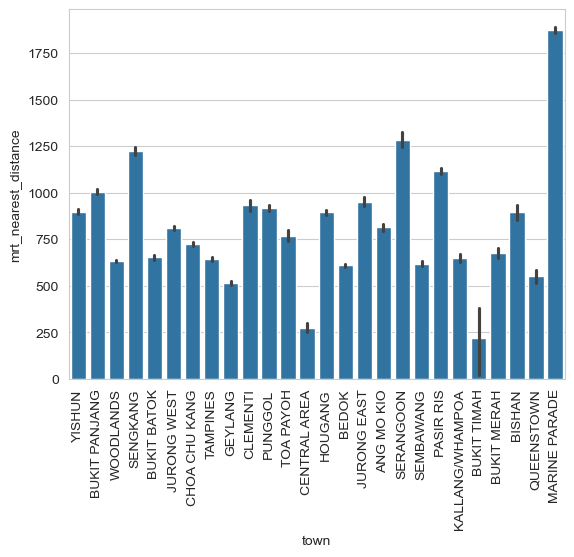

In [118]:
sns.barplot(data=less_500, x='town', y='mrt_nearest_distance')
plt.xticks(rotation=90)
plt.show()